## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
#importing json file for co-ordinates.
country_geo=r'/Users/keerthiputti/Downloads/Achievement 6/us-states.json'

In [3]:
country_geo

'/Users/keerthiputti/Downloads/Achievement 6/us-states.json'

In [4]:
#Create path
path=r'/Users/keerthiputti/Downloads/Achievement 6/cancer incidents/02 Data'

In [6]:
#importing the data
df_data=pd.read_csv(os.path.join(path,'Prepared Data','2018_19_cancer_incidents.csv'),index_col=False)

In [7]:
df_data

,Leading Cancer Sites,States,Year,Age Groups,Gender,Gender Code,Count,Population,Crude Rate,Region,Age_Flag,Age_max
0,Brain and Other Nervous System,Alabama,2018,60-64 years,Female,F,23.0,168342.0,13.7,South,Middle age group,64.0
1,Brain and Other Nervous System,Alabama,2018,65-69 years,Female,F,21.0,145302.0,14.5,South,Elderly group,69.0
2,Brain and Other Nervous System,Alabama,2018,70-74 years,Female,F,23.0,117686.0,19.5,South,Elderly group,74.0
3,Brain and Other Nervous System,Alabama,2018,75-79 years,Female,F,19.0,84846.0,22.4,South,Elderly group,79.0
4,Brain and Other Nervous System,Alabama,2018,80-84 years,Female,F,18.0,58233.0,30.9,South,Elderly group,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24436,"Urinary Bladder, invasive and in situ",Wisconsin,2019,65-69 years,Female,F,41.0,173144.0,23.7,Mid-West,Elderly group,69.0
24437,"Urinary Bladder, invasive and in situ",Wisconsin,2019,70-74 years,Female,F,76.0,133024.0,57.1,Mid-West,Elderly group,74.0
24438,"Urinary Bladder, invasive and in situ",Wisconsin,2019,75-79 years,Female,F,69.0,94842.0,72.8,Mid-West,Elderly group,79.0
24439,"Urinary Bladder, invasive and in situ",Wisconsin,2019,80-84 years,Female,F,53.0,67245.0,78.8,Mid-West,Elderly group,84.0


In [8]:
df_data.shape

(24441, 12)

We have done data cleaning but we have not checked any extreme values with histogram.Just run check for extreme values.

<AxesSubplot:xlabel='Count', ylabel='Count'>

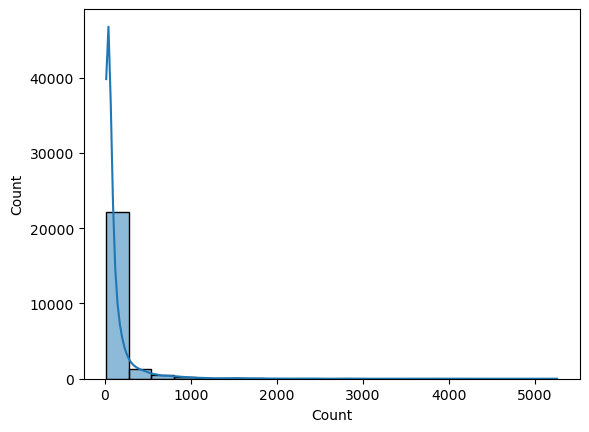

In [9]:
#extreme value for count
sns.histplot(df_data['Count'], bins=20, kde = True)

In [10]:
df_data[df_data['Count'] > 5000]

,Leading Cancer Sites,States,Year,Age Groups,Gender,Gender Code,Count,Population,Crude Rate,Region,Age_Flag,Age_max
16899,Prostate,California,2019,65-69 years,Male,M,5263.0,883216.0,595.9,West,Elderly group,69.0


As the data is sourced from CDC , we can be assured that the data is correct.Even thought 5263 looks like a huge number, this can be useful for our analysis. Hence I have decided to keep it.

<AxesSubplot:xlabel='Population', ylabel='Count'>

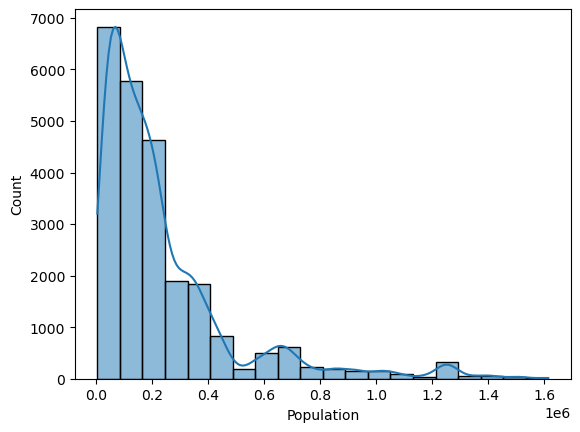

In [11]:
#checking population as well
sns.histplot(df_data['Population'], bins=20, kde = True)

In [12]:
df_data[df_data['Population']> 1600000]

,Leading Cancer Sites,States,Year,Age Groups,Gender,Gender Code,Count,Population,Crude Rate,Region,Age_Flag,Age_max
6336,Brain and Other Nervous System,California,2018,25-29 years,Male,M,43.0,1614451.0,2.7,West,Young age group,29.0
6636,Colon and Rectum,California,2018,25-29 years,Male,M,42.0,1614451.0,2.6,West,Young age group,29.0
7395,Kidney and Renal Pelvis,California,2018,25-29 years,Male,M,22.0,1614451.0,1.4,West,Young age group,29.0
8028,Leukemias,California,2018,25-29 years,Male,M,42.0,1614451.0,2.6,West,Young age group,29.0
9137,Melanoma of the Skin,California,2018,25-29 years,Male,M,39.0,1614451.0,2.4,West,Young age group,29.0
9861,Non-Hodgkin Lymphoma,California,2018,25-29 years,Male,M,65.0,1614451.0,4.0,West,Young age group,29.0
10283,Oral Cavity and Pharynx,California,2018,25-29 years,Male,M,20.0,1614451.0,1.2,West,Young age group,29.0
11653,Thyroid,California,2018,25-29 years,Male,M,57.0,1614451.0,3.5,West,Young age group,29.0


There are good number of young men between 25-29 in california. We will keep this data as well.

## Geogrphical visulization
I will be creating 6 visulization for my analysis
1. complete data for all states with count
2. complete data for all states with crude rate
3. 2018 data for all states with count
4. 2019 data for all states with count
5. Male data for all states with count
6. Female data for all states with count

In [13]:
#data to plot full data
df_data_plot=df_data[['States','Count','Crude Rate','Age_max']]

In [14]:
df_data_plot

,States,Count,Crude Rate,Age_max
0,Alabama,23.0,13.7,64.0
1,Alabama,21.0,14.5,69.0
2,Alabama,23.0,19.5,74.0
3,Alabama,19.0,22.4,79.0
4,Alabama,18.0,30.9,84.0
...,...,...,...,...
24436,Wisconsin,41.0,23.7,69.0
24437,Wisconsin,76.0,57.1,74.0
24438,Wisconsin,69.0,72.8,79.0
24439,Wisconsin,53.0,78.8,84.0


In [15]:
#data of 2018
df_data_2018 = df_data.loc[(df_data['Year'] == 2018) , ['States','Year','Count','Crude Rate','Age_max']]

In [16]:
df_data_2018

,States,Year,Count,Crude Rate,Age_max
0,Alabama,2018,23.0,13.7,64.0
1,Alabama,2018,21.0,14.5,69.0
2,Alabama,2018,23.0,19.5,74.0
3,Alabama,2018,19.0,22.4,79.0
4,Alabama,2018,18.0,30.9,84.0
...,...,...,...,...,...
12258,Wyoming,2018,20.0,116.5,69.0
12259,Wyoming,2018,18.0,145.9,74.0
12260,Wyoming,2018,16.0,204.8,79.0
12261,Wyoming,2018,22.0,471.6,84.0


In [17]:
#data of 2019
df_data_2019 = df_data.loc[(df_data['Year'] == 2019) , ['States','Year','Count','Crude Rate','Age_max']]

In [18]:
df_data_2019

,States,Year,Count,Crude Rate,Age_max
12263,Alabama,2019,19.0,12.7,54.0
12264,Alabama,2019,23.0,14.2,59.0
12265,Alabama,2019,30.0,19.8,64.0
12266,Alabama,2019,36.0,28.2,69.0
12267,Alabama,2019,20.0,29.3,79.0
...,...,...,...,...,...
24436,Wisconsin,2019,41.0,23.7,69.0
24437,Wisconsin,2019,76.0,57.1,74.0
24438,Wisconsin,2019,69.0,72.8,79.0
24439,Wisconsin,2019,53.0,78.8,84.0


In [19]:
#data of male
df_data_male = df_data.loc[(df_data['Gender'] == 'Male') , ['States','Gender','Count','Crude Rate','Age_max']]

In [20]:
df_data_male

,States,Gender,Count,Crude Rate,Age_max
6318,Alabama,Male,18.0,11.8,54.0
6319,Alabama,Male,19.0,11.8,59.0
6320,Alabama,Male,24.0,16.0,64.0
6321,Alabama,Male,27.0,21.5,69.0
6322,Alabama,Male,25.0,25.3,74.0
...,...,...,...,...,...
18171,Wisconsin,Male,174.0,388.4,89.0
18172,Wyoming,Male,29.0,163.7,69.0
18173,Wyoming,Male,18.0,136.8,74.0
18174,Wyoming,Male,25.0,304.2,79.0


In [21]:
#data of female
df_data_female = df_data.loc[(df_data['Gender'] == 'Female') , ['States','Gender','Count','Crude Rate','Age_max']]

In [22]:
df_data_female

,States,Gender,Count,Crude Rate,Age_max
0,Alabama,Female,23.0,13.7,64.0
1,Alabama,Female,21.0,14.5,69.0
2,Alabama,Female,23.0,19.5,74.0
3,Alabama,Female,19.0,22.4,79.0
4,Alabama,Female,18.0,30.9,84.0
...,...,...,...,...,...
24436,Wisconsin,Female,41.0,23.7,69.0
24437,Wisconsin,Female,76.0,57.1,74.0
24438,Wisconsin,Female,69.0,72.8,79.0
24439,Wisconsin,Female,53.0,78.8,84.0


## Viz for all states incidence count

In [23]:
# Setup a folium map at a high-level zoom
map_count= folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_data_plot,
    columns = ["States", "Count"],
    key_on = "feature.properties.name", # this part is very important - check your json file to see where the KEY is located
    fill_color = "YlOrRd", fill_opacity=0.6, line_opacity=0.1,nan_fill_color="White",
    legend_name = "Count").add_to(map_count),
folium.LayerControl().add_to(map_count)

map_count

## Viz for all states incidence crude rate

In [24]:
# Setup a folium map at a high-level zoom
map_crude_rate= folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_data_plot,
    columns = ["States", "Crude Rate"],
    key_on = "feature.properties.name", # this part is very important - check your json file to see where the KEY is located
    fill_color = "YlOrRd", fill_opacity=0.6, line_opacity=0.1,nan_fill_color="White",
    legend_name = "Crude Rate").add_to(map_crude_rate)
folium.LayerControl().add_to(map_crude_rate)

map_crude_rate

In [25]:
df_data[df_data['States']=='Nevada']

,Leading Cancer Sites,States,Year,Age Groups,Gender,Gender Code,Count,Population,Crude Rate,Region,Age_Flag,Age_max


There is no data for Nevada and hence I set it as white.

## Viz for 2018 data

In [26]:
# Setup a folium map at a high-level zoom
map_count_2018= folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_data_2018,
    columns = ["States", "Count"],
    key_on = "feature.properties.name", # this part is very important - check your json file to see where the KEY is located
    fill_color = "YlOrRd", fill_opacity=0.6, line_opacity=0.1,nan_fill_color="White",
    legend_name = "Count").add_to(map_count_2018)
folium.LayerControl().add_to(map_count_2018)

map_count_2018

## Viz for 2019 data

In [27]:
# Setup a folium map at a high-level zoom
map_count_2019= folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_data_2019,
    columns = ["States", "Count"],
    key_on = "feature.properties.name", # this part is very important - check your json file to see where the KEY is located
    fill_color = "YlOrRd", fill_opacity=0.6, line_opacity=0.1,nan_fill_color="White",
    legend_name = "Count").add_to(map_count_2019)
folium.LayerControl().add_to(map_count_2019)

map_count_2019

## Viz for Male population incidence count

In [28]:
# Setup a folium map at a high-level zoom
map_count_male= folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_data_male,
    columns = ["States", "Count"],
    key_on = "feature.properties.name", # this part is very important - check your json file to see where the KEY is located
    fill_color = "PuRd", fill_opacity=0.6, line_opacity=0.1,nan_fill_color="White",
    legend_name = "Count").add_to(map_count_male)
folium.LayerControl().add_to(map_count_male)

map_count_male

## Viz for female population incidence count

In [29]:
# Setup a folium map at a high-level zoom
map_count_female= folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_data_female,
    columns = ["States", "Count"],
    key_on = "feature.properties.name", # this part is very important - check your json file to see where the KEY is located
    fill_color = "PuRd", fill_opacity=0.6, line_opacity=0.1,nan_fill_color="White",
    legend_name = "Count").add_to(map_count_female)
folium.LayerControl().add_to(map_count_female)

map_count_female

## Questions answered by the geographical visualization

Conclusions so far
1. California, New York and Florida has the most cancer incidences compared to any other states. However, these 3 states have the highest population as well. So the crude rates are relatively less.Also keep in mind that suppressed(less than 9 incidneces) are not part of the data.
2. Its very apparent that men are more susceptable to cancer than women. There are multiple types of cancer that are detected more in men than women. However, this is just incidence count. So mortality rate also should be considered before concluding anything.
3. I have not done any age related visulization here. but from previous task, I have gathered that Elderly group is mostly vulnerable than any other age group.

Addtional questions
1. which type of Cancer is more registered in different age groups?